## Import

In [1]:
import nltk
import numpy as np
import pandas as pd
import re
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
wordnet_lemmatizer = WordNetLemmatizer()
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
from sklearn.feature_extraction.text import TfidfVectorizer

ImportError: No module named 'nltk'

In [ ]:
!conda install nltk

In [5]:
nltk.download()

NameError: name 'nltk' is not defined

## Importing Data

In [2]:
data = pd.read_csv('fake_or_real_news.csv')

In [3]:
data

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [4]:
data['news']= data['title'] + data['text']

In [5]:
data

,Unnamed: 0,title,text,label,news
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,"You Can Smell Hillary’s FearDaniel Greenfield,..."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,Kerry to go to Paris in gesture of sympathyU.S...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,Bernie supporters on Twitter erupt in anger ag...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,The Battle of New York: Why This Primary Matte...
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE,"Tehran, USA \nI’m not an immigrant, but my gr..."
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE,Girl Horrified At What She Watches Boyfriend D...
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL,‘Britain’s Schindler’ Dies at 106A Czech stock...
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL,Fact check: Trump and Clinton at the 'commande...
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL,Iran reportedly makes new push for uranium con...


## Top 25 words in Real news

In [6]:
real_news = data[data['label']=='REAL']
real_news = real_news.reset_index()

In [7]:
for i in range(0,3171):
    real = re.sub('[^a-zA-z]', ' ', real_news['news'][i] )
    real = real.lower()
    real = real.split()
    real = [wordnet_lemmatizer.lemmatize(word) for word in real if not word in stopwords]

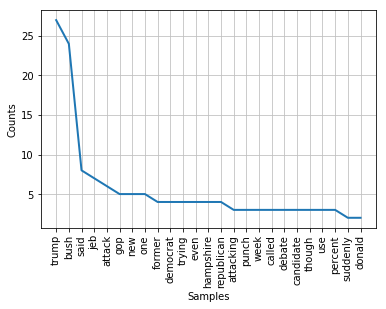

In [8]:
%matplotlib inline
freq1 = nltk.FreqDist(real)
freq1.plot(25)

## Top 25 words in Fake news

In [9]:
fake_news = data[data['label']=='FAKE']
fake_news = fake_news.reset_index()

In [10]:
fake_news.shape

(3164, 6)

In [11]:
for i in range(0,3164):
    fake = re.sub('[^a-zA-z]', ' ', fake_news['news'][i] )
    fake = fake.lower()
    fake = fake.split()
    fake = [wordnet_lemmatizer.lemmatize(word) for word in fake if not word in stopwords]

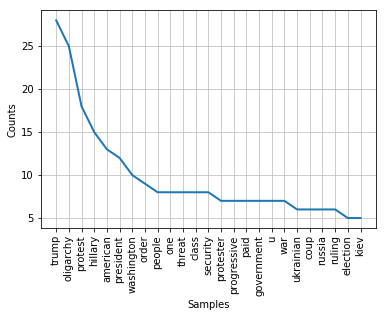

In [12]:
freq2 = nltk.FreqDist(fake)
freq2.plot(25)

## Tokenizer function

In [13]:
def my_tokenizer(s):
    s = s.lower()
    tokens = nltk.tokenize.word_tokenize(s) 
    tokens = [t for t in tokens if len(t) > 2]
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens]
    tokens = [t for t in tokens if t not in stopwords]
    return tokens

## Applying Tokenizer function following by removinng stop words

In [14]:
data['news']= [my_tokenizer(data['news'][i]) for i in range(0,6335)]

## Converting again to string

In [15]:
data['news']= data['news'].apply(' '.join)

In [16]:
data['news']

0       smell hillary feardaniel greenfield shillman j...
1       watch exact moment paul ryan committed politic...
2       kerry paris gesture sympathyu.s secretary stat...
3       bernie supporter twitter erupt anger dnc 'we t...
4       battle new york primary mattersit primary day ...
5       tehran usa immigrant grandparent year ago arri...
6       girl horrified watch boyfriend left facetime o...
7       britain schindler dy 106a czech stockbroker sa...
8       fact check trump clinton 'commander-in-chief f...
9       iran reportedly make new push uranium concessi...
10      three clinton iowa glimpse fire ha eluded hill...
11      donald trump shockingly weak delegate game som...
12      strong solar storm tech risk today news oct.26...
13      way america preparing world war 3october 2016 ...
14      trump take cruz lightlykilling obama administr...
15      woman lead differentlyas woman move high offic...
16      shocking michele obama hillary caught glamoriz...
17      hillar

## Applying tfidfvectorizer

In [17]:
vectorizer = TfidfVectorizer()

In [18]:
matrix = vectorizer.fit_transform(data['news'])

## Spliting dataset in training and test dataset

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(matrix, data['label'], test_size=0.2)

## Building Multinomial Naive Bayes model

In [20]:
from sklearn.naive_bayes import MultinomialNB
news_detect_model = MultinomialNB().fit(x_train,y_train)

## Predicting on test dataset using treained model

In [21]:
all_predictions = news_detect_model.predict(x_test)
print (all_predictions)

['REAL' 'FAKE' 'FAKE' ... 'REAL' 'FAKE' 'FAKE']


## Classification Report

In [22]:
from sklearn.metrics import classification_report
print (classification_report(y_test, all_predictions))

             precision    recall  f1-score   support

       FAKE       0.98      0.65      0.78       650
       REAL       0.73      0.99      0.84       617

avg / total       0.86      0.81      0.81      1267



## Logistic Regression Model

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
model = LogisticRegression()
model.fit(x_train, y_train)
print ("Classification rate:", model.score(x_test, y_test))

Classification rate: 0.9139700078926598


## Predicting using logistic regression model

In [25]:
predict = model.predict(x_test)

## Classification report for logistic regression model

In [26]:
print (classification_report(y_test,predict))

             precision    recall  f1-score   support

       FAKE       0.90      0.94      0.92       650
       REAL       0.93      0.89      0.91       617

avg / total       0.91      0.91      0.91      1267



## Logistic Regression predicts with more accuracy than multinomial naive bayes model

In [28]:
y_train = y_train.replace('REAL',1)

In [29]:
y_train = y_train.replace('FAKE',0)

In [30]:
y_test = y_test.replace('REAL',1)

In [31]:
y_test = y_test.replace('FAKE',0)

## Building and training Neural Network

In [36]:
import keras
from keras.models import Sequential
from keras.layers import Dense
classifier = Sequential()
classifier.add(Dense(units = 100, kernel_initializer = 'uniform', activation = 'relu', input_dim =x_train.shape[1]))
classifier.add(Dense(units = 100, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer= 'adam' , loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(x_train, y_train, batch_size=10 , epochs= 10)
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

Epoch 1/10
5068/5068 [==============================] - 54s 11ms/step - loss: 0.2717 - acc: 0.8790
Epoch 2/10
5068/5068 [==============================] - 55s 11ms/step - loss: 0.0213 - acc: 0.9939
Epoch 3/10
5068/5068 [==============================] - 55s 11ms/step - loss: 0.0015 - acc: 0.9998
Epoch 4/10
5068/5068 [==============================] - 56s 11ms/step - loss: 4.1697e-04 - acc: 1.0000
Epoch 5/10
5068/5068 [==============================] - 57s 11ms/step - loss: 2.1164e-04 - acc: 1.0000
Epoch 6/10
5068/5068 [==============================] - 55s 11ms/step - loss: 1.2303e-04 - acc: 1.0000
Epoch 7/10
5068/5068 [==============================] - 57s 11ms/step - loss: 7.6922e-05 - acc: 1.0000
Epoch 8/10
5068/5068 [==============================] - 54s 11ms/step - loss: 5.0865e-05 - acc: 1.0000
Epoch 9/10
5068/5068 [==============================] - 51s 10ms/step - loss: 3.4469e-05 - acc: 1.0000
Epoch 10/10
5068/5068 [==============================] - 67s 13ms/step - loss: 2.4015

## Evaluating the model

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[612  38]
 [ 50 567]]


In [39]:
print (classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.92      0.94      0.93       650
          1       0.94      0.92      0.93       617

avg / total       0.93      0.93      0.93      1267



## The accuracy increased significantly as we use neural network.